In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
df = pd.read_csv('data/Train.csv', low_memory=False)

* DtypeWarning: Columns (13,39,40,41) have mixed types

In [3]:
df.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
401120,6333336,10500,1840702,21439,149,1,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401121,6333337,11000,1830472,21439,149,1,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401122,6333338,11500,1887659,21439,149,1,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401123,6333341,9000,1903570,21435,149,2,2005,NaN,NaN,10/25/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401124,6333342,7750,1926965,21435,149,2,2005,NaN,NaN,10/25/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [4]:
df.iloc[:, -13:].tail()

,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
401120,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401121,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401122,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401123,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401124,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [32]:
print df['saledate'].sort_values().iloc[[0,-1]]

268962    1/10/2003 0:00
22602      9/9/2011 0:00
Name: saledate, dtype: object


In [5]:
df['ProductGroup'].unique()

array(['WL', 'SSL', 'TEX', 'BL', 'TTT', 'MG'], dtype=object)

In [6]:
df['ProductGroupDesc'].unique()

array(['Wheel Loader', 'Skid Steer Loaders', 'Track Excavators',
       'Backhoe Loaders', 'Track Type Tractors', 'Motor Graders'], dtype=object)

In [7]:
df.groupby(['ProductGroup', 'ProductGroupDesc'])[['SalesID']].count().rename(columns={'SalesID': 'Count'})

,,Count
ProductGroup,ProductGroupDesc,
BL,Backhoe Loaders,79415
MG,Motor Graders,25489
SSL,Skid Steer Loaders,43488
TEX,Track Excavators,101167
TTT,Track Type Tractors,80520
WL,Wheel Loader,71046


In [8]:
df.groupby('ProductGroupDesc')['SalePrice'].describe().unstack(level=-1)


,count,mean,std,min,25%,50%,75%,max
ProductGroupDesc,,,,,,,,
Backhoe Loaders,79415,20897.352553,7601.831029,7500,15000,20500,26000,40000
Motor Graders,25489,47251.564518,32765.783030,8000,19000,40000,67000,142000
Skid Steer Loaders,43488,10549.458563,3551.567838,4750,7900,10000,13000,20000
Track Excavators,101167,35666.120622,23618.215130,7500,17000,29000,49000,110000
Track Type Tractors,80520,36158.412221,24338.874294,8000,18000,29000,46000,127500
Wheel Loader,71046,37052.463249,22596.334012,8000,18500,32000,51000,107000


# Backhoe Loader
<img src=http://www.libertyequalitygeology.com/wp-content/uploads/2015/09/backhoe-loader.jpg width=300px>

# Motor Grader

<img src=https://www.deere.com/common/media/images/product/motor_graders/670g_ft4/670g_left_front_3qtr_balrrd_642x462.png width=300px>

# Skid Steer Loaders
<img src=http://s7d2.scene7.com/is/image/Caterpillar/C832998?$cc-g$ width=300px>

/Users/l/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


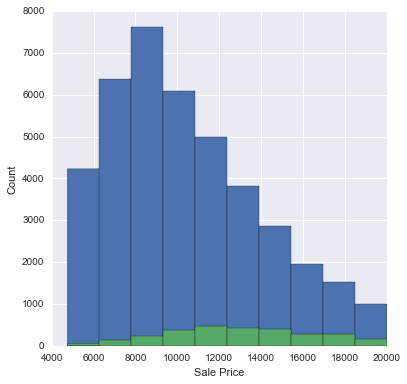

In [10]:
plt.figure(figsize=(6,6))
df.groupby(['ProductGroupDesc', df.columns[-13]])['SalePrice'].hist()
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.legend()

In [11]:
df.groupby(['ProductGroupDesc', df.columns[-13]])[['SalePrice']].count().rename(columns={'SalePrice': 'Count'})

Count
ProductGroupDesc   Grouser_Tracks            
Skid Steer Loaders None or Unspecified  40515
                   Yes                   2847

In [12]:
df.groupby(['ProductGroupDesc', df.columns[-12]])[['SalePrice']].count().rename(columns={'SalePrice': 'Count'})

Count
ProductGroupDesc   Hydraulics_Flow           
Skid Steer Loaders High Flow              553
                   None or Unspecified     25
                   Standard             42784

# Track Excavators
<img src=https://www.deere.com/en_US/media/images/product/construction/excavators/470g/r4d016306_470g_642x462.png width=300>

In [13]:
df.groupby(['ProductGroupDesc', df.columns[-11]])[['SalePrice']].count().rename(columns={'SalePrice': 'Count'})

Count
ProductGroupDesc Track_Type       
Track Excavators Rubber      14273
                 Steel       84880

In [14]:
df.groupby(['ProductGroupDesc', df.columns[-10]])[['SalePrice']].count().rename(columns={'SalePrice': 'Count'})

Count
ProductGroupDesc Undercarriage_Pad_Width       
Track Excavators 14 inch                     49
                 15 inch                     33
                 16 inch                    460
                 18 inch                   1429
                 20 inch                   2652
                 22 inch                    133
                 24 inch                   2962
                 25 inch                     17
                 26 inch                     97
                 27 inch                    143
                 28 inch                   3114
                 30 inch                   1592
                 31 inch                    184
                 31.5 inch                    2
                 32 inch                   5213
                 33 inch                     91
                 34 inch                    531
                 36 inch                   1519
                 None or Unspecified      79651

In [15]:
df.groupby(['ProductGroupDesc', df.columns[-9]])[['SalePrice']].count().rename(columns={'SalePrice': 'Count'})

Count
ProductGroupDesc Stick_Length              
Track Excavators 10' 10"                404
                 10' 2"                 983
                 10' 6"                3456
                 11' 0"                1577
                 11' 10"                299
                 12' 10"               1066
                 12' 4"                  97
                 12' 8"                 317
                 13' 10"                  6
                 13' 7"                  10
                 13' 9"                   7
                 14' 1"                   7
                 15' 4"                   3
                 15' 9"                  84
                 19' 8"                   5
                 24' 3"                   2
                 6' 3"                   50
                 7' 10"                   3
                 8' 10"                 103
                 8' 2"                  606
                 8' 4"                  271
                 8' 6"                  901
                 9' 10"                1439
                 9' 2"                    1
                 9' 5"                  101
                 9' 6"                 5765
                 9' 7"                 1401
                 9' 8"                 1434
                 None or Unspecified  78820

In [16]:
df.groupby(['ProductGroupDesc', df.columns[-8]])[['SalePrice']].count().rename(columns={'SalePrice': 'Count'})

Count
ProductGroupDesc Thumb                     
Track Excavators Hydraulic             6837
                 Manual                9358
                 None or Unspecified  83093

In [17]:
df.groupby(['ProductGroupDesc', df.columns[-7]])[['SalePrice']].count().rename(columns={'SalePrice': 'Count'})

Count
ProductGroupDesc Pattern_Changer           
Track Excavators No                      65
                 None or Unspecified  90255
                 Yes                   8898

In [18]:
df.groupby(['ProductGroupDesc', df.columns[-6]])[['SalePrice']].count().rename(columns={'SalePrice': 'Count'})

Count
ProductGroupDesc Grouser_Type       
Track Excavators Double        84653
                 Single            2
                 Triple        14498

# Tract Type Tractors
<img src=http://s7d2.scene7.com/is/image/Caterpillar/C833848?$cc-g$ width=300px>

In [19]:
df.groupby(['ProductGroupDesc', df.columns[-5]])[['SalePrice']].count().rename(columns={'SalePrice': 'Count'})

Count
ProductGroupDesc    Backhoe_Mounting          
Track Type Tractors None or Unspecified  78652
                    Yes                     20

In [20]:
df.groupby(['ProductGroupDesc', df.columns[-4]])[['SalePrice']].count().rename(columns={'SalePrice': 'Count'})

Count
ProductGroupDesc    Blade_Type                
Track Type Tractors Angle                 1662
                    Coal                    11
                    Landfill                25
                    No                     743
                    None or Unspecified  11431
                    PAT                  38612
                    Semi U                8617
                    Straight             13323
                    U                     1862
                    VPAT                  3547

In [21]:
df.groupby(['ProductGroupDesc', df.columns[-3]])[['SalePrice']].count().rename(columns={'SalePrice': 'Count'})

Count
ProductGroupDesc    Travel_Controls           
Track Type Tractors 1 Speed                 10
                    2 Pedal               1142
                    Differential Steer    4879
                    Finger Tip            2624
                    Lever                  840
                    None or Unspecified  69923
                    Pedal                  416

# Wheel Loader
<img src=http://www.construction-machine.org/wp-content/uploads/2012/06/Types-Of-Wheel-Loaders.jpg width=300px>

In [22]:
df.groupby(['ProductGroupDesc', df.columns[-2]])[['SalePrice']].count().rename(columns={'SalePrice': 'Count'})

Count
ProductGroupDesc Differential_Type       
Wheel Loader     Limited Slip        1130
                 Locking                2
                 No Spin              206
                 Standard           68073

In [23]:
df.groupby(['ProductGroupDesc', df.columns[-1]])[['SalePrice']].count().rename(columns={'SalePrice': 'Count'})

Count
ProductGroupDesc Steering_Controls         
Wheel Loader     Command Control        537
                 Conventional         68679
                 Four Wheel Standard    138
                 No                       1
                 Wheel                   14